In [1]:
!pip install pandas numpy requests matplotlib scikit-learn joblib



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\adars\Downloads\archive.zip")

In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Disaster Type  Latitude  Longitude  Total Deaths  Total Affected  duration  \
0              0   52.6717    -0.2995         300.0          3000.0       0.0   
1              0   35.6897   139.6920        1379.0         13790.0       0.0   
2              0   39.9050   116.3910      100000.0       1000000.0       0.0   
3              0   23.1288   113.2590           0.0       3000000.0       0.0   
4              0   39.1467   117.2060           0.0        635000.0       0.0   

   time     Rainfall  Elevation      Slope  distance  occured  
0  1900  1383.125626       11.0   1.788207       0.0        1  
1  1909  1383.125626       49.0  24.356508       0.0        1  
2  1909   580.345856       55.0   8.374380       0.0        1  
3  1912  2993.401777        7.0  12.917221       0.0        1  
4  1913  1383.125626        3.0   1.513093       0.0        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          N

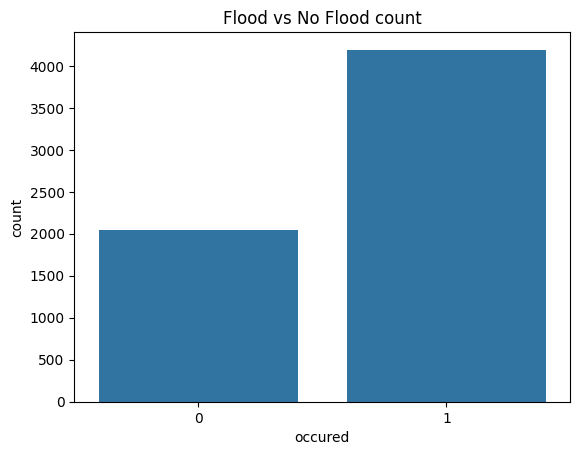

In [6]:
sns.countplot(x='occured', data=df)
plt.title("Flood vs No Flood count")
plt.show()


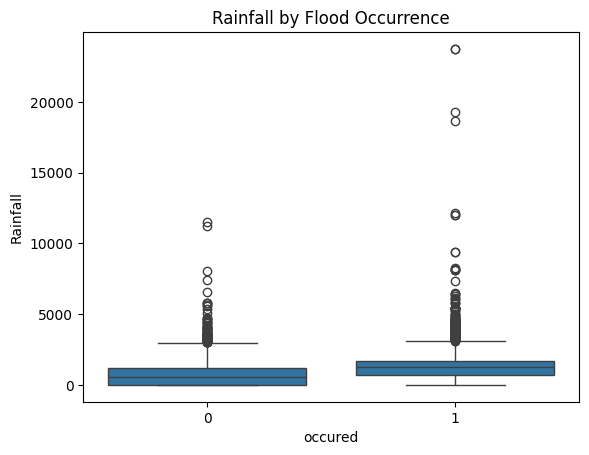

In [7]:
sns.boxplot(x='occured', y='Rainfall', data=df)
plt.title("Rainfall by Flood Occurrence")
plt.show()


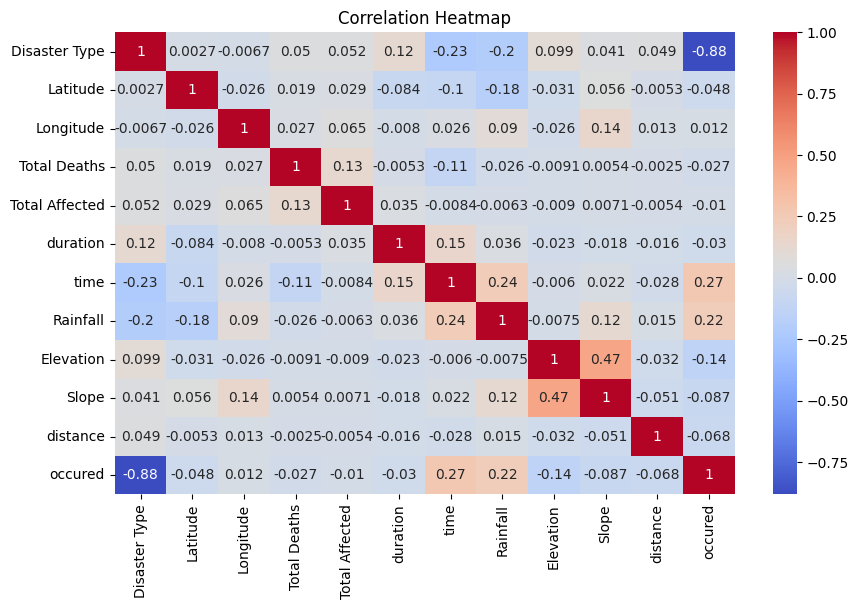

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
df = pd.get_dummies(df, columns=['Disaster Type'], drop_first=True)

scaler = StandardScaler()
features = ['Latitude','Longitude','Total Deaths','Total Affected',
            'duration','Rainfall','Elevation','Slope','distance']

df[features] = scaler.fit_transform(df[features])

X = df.drop(columns=['occured'])
y = df['occured']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)

Feature Importances:
 Disaster Type_2    0.384875
Disaster Type_4    0.195759
Rainfall           0.154612
Disaster Type_1    0.140633
Total Deaths       0.024120
time               0.020898
Total Affected     0.018463
Elevation          0.014894
duration           0.012787
Longitude          0.012502
Latitude           0.008360
Slope              0.007323
distance           0.004773
dtype: float64


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       839

    accuracy                           1.00      1248
   macro avg       1.00      1.00      1.00      1248
weighted avg       1.00      1.00      1.00      1248


Confusion Matrix:
 [[409   0]
 [  0 839]]

ROC AUC: 1.0


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='f1')
print("CV F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

CV F1 Scores: [1.         1.         0.99880526 1.         1.        ]
Mean CV F1: 0.9997610513739545


In [13]:

X = df[['Rainfall', 'Elevation', 'Slope', 'Latitude', 'Longitude', 'distance', 'time', 'duration']]
y = df['occured']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [14]:
print("Accuracy:", rf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Accuracy: 0.8325320512820513

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.58      0.69       409
           1       0.82      0.95      0.88       839

    accuracy                           0.83      1248
   macro avg       0.84      0.77      0.79      1248
weighted avg       0.84      0.83      0.82      1248

Confusion Matrix:
 [[238 171]
 [ 38 801]]
ROC AUC: 0.8823593694903993


In [15]:
cv_f1 = cross_val_score(rf, X, y, cv=5, scoring='f1')
cv_auc = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

print("\nCV F1 Scores:", cv_f1, "Mean:", np.mean(cv_f1))
print("CV ROC-AUC Scores:", cv_auc, "Mean:", np.mean(cv_auc))


CV F1 Scores: [0.10609481 0.1643002  0.21853806 0.53004428 0.81007752] Mean: 0.36581097237714433
CV ROC-AUC Scores: [0.95243639 0.73168955 0.13573475 0.32857222 0.7368633 ] Mean: 0.5770592413483383


In [16]:
import joblib

# Save model
joblib.dump(rf, r"C:\Users\adars\OneDrive\Desktop\Flood\flood_rf_model.pkl")
joblib.dump(scaler, r"C:\Users\adars\OneDrive\Desktop\Flood\scaler.pkl")
print("Model saved as flood_rf_model.pkl")



Model saved as flood_rf_model.pkl


In [17]:
loaded_model = joblib.load("flood_rf_model.pkl")

y_pred_loaded = loaded_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy (loaded model):", accuracy_score(y_test, y_pred_loaded))


Accuracy (loaded model): 0.8325320512820513
